# Анализируем перепись населения в штатах

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/counties.csv')

In [4]:
df.shape

(3138, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   census_id           3138 non-null   int64  
 1   state               3138 non-null   object 
 2   county              3138 non-null   object 
 3   region              3138 non-null   object 
 4   metro               3138 non-null   object 
 5   population          3138 non-null   int64  
 6   men                 3138 non-null   int64  
 7   women               3138 non-null   int64  
 8   hispanic            3138 non-null   float64
 9   white               3138 non-null   float64
 10  black               3138 non-null   float64
 11  native              3138 non-null   float64
 12  asian               3138 non-null   float64
 13  pacific             3138 non-null   float64
 14  citizens            3138 non-null   int64  
 15  income              3138 non-null   int64  
 16  income

In [7]:
df.isnull().sum()

census_id             0
state                 0
county                0
region                0
metro                 0
population            0
men                   0
women                 0
hispanic              0
white                 0
black                 0
native                0
asian                 0
pacific               0
citizens              0
income                0
income_err            0
income_per_cap        0
income_per_cap_err    0
poverty               0
child_poverty         1
professional          0
service               0
office                0
construction          0
production            0
drive                 0
carpool               0
transit               0
walk                  0
other_transp          0
work_at_home          0
mean_commute          0
employed              0
private_work          0
public_work           0
self_employed         0
family_work           0
unemployment          0
land_area             0
dtype: int64

In [11]:
df[df.state == 'California'].shape[0]

58

In [16]:
df[df.metro == 'Metro'].state.nunique()

50

In [17]:
df.state.nunique()

50

In [26]:
df_alabama_m = df[(df.state == 'Alabama') & (df.metro == 'Metro')].reset_index(drop=True)

In [28]:
df_alabama_m[df_alabama_m.population == df_alabama_m.population.min()]

,census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
18,1085,Alabama,Lowndes,South,Metro,10742,5125,5617,0.3,25.3,...,0.3,2.7,29.5,3471,73.9,20.5,4.2,1.5,13.2,715.91


Вывести топ-5 штатов по кол-ву населения. 

In [36]:
df.groupby('state').population.sum().sort_values(ascending=False).head()

state
California    38421464
Texas         26538497
New York      19673174
Florida       19645772
Illinois      12873761
Name: population, dtype: int64

In [38]:
df.population.sum()

315845353

In [41]:
df.groupby(['metro', 'state']).population.mean()

metro     state        
Metro     Alabama          1.265992e+05
          Alaska           1.649967e+05
          Arizona          7.868931e+05
          Arkansas         9.034335e+04
          California       1.015876e+06
                               ...     
Nonmetro  Virginia         2.002409e+04
          Washington       3.959217e+04
          West Virginia    2.099697e+04
          Wisconsin        3.271235e+04
          Wyoming          1.924938e+04
Name: population, Length: 97, dtype: float64

In [42]:
df.groupby(['state', 'metro']).population.mean()

state          metro   
Alabama        Metro       126599.206897
               Nonmetro     30506.394737
Alaska         Metro       164996.666667
               Nonmetro      9218.840000
Arizona        Metro       786893.125000
                               ...      
West Virginia  Nonmetro     20996.970588
Wisconsin      Metro       162974.961538
               Nonmetro     32712.347826
Wyoming        Metro        87721.000000
               Nonmetro     19249.380952
Name: population, Length: 97, dtype: float64

## Переходим к визуализации

<AxesSubplot:>

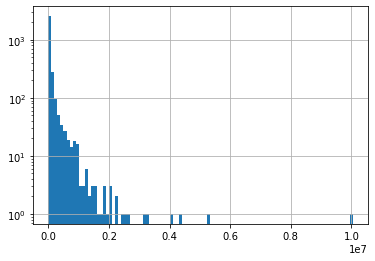

In [49]:
df.population.hist(bins=100, log=True)

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

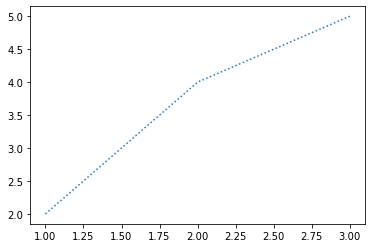

In [54]:
plt.plot([1, 2, 3], [2, 4, 5], linestyle=':')

In [55]:
df = pd.read_csv('data/video_games_sales.csv')

### Про типы переменных

- непрерывные переменные (рост человека, выручка магазина, объем продаж, кол-во лайков)
- категориальные (ограниченное маленькое число значений)
- дата

### 1. Графики для непрерывных переменных
- lineplot

Хотим посмотреть на суммарное кол-во продаж в каждый год

In [62]:
df_sales = df.groupby('Year_of_Release').Global_Sales.sum().reset_index()

Text(0.5, 1.0, 'Динамика продаж игр во времени')

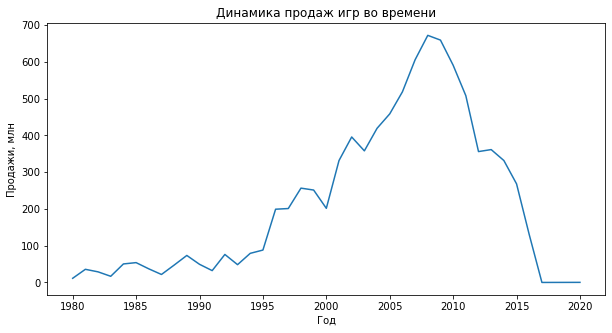

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(df_sales.Year_of_Release, df_sales.Global_Sales)
plt.xlabel('Год')
plt.ylabel('Продажи, млн')
plt.title('Динамика продаж игр во времени')

# plt.savefig('plot.png')

In [101]:
useful_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

df_sales = df.groupby('Year_of_Release')[useful_cols].sum().reset_index()

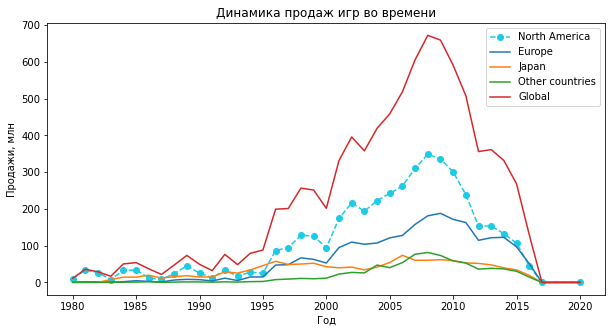

In [141]:
plt.figure(figsize=(10, 5))

plt.plot(df_sales.Year_of_Release, df_sales.NA_Sales, label='North America', color='#1ccbe5', ls='--', marker='o')
plt.plot(df_sales.Year_of_Release, df_sales.EU_Sales, label='Europe')
plt.plot(df_sales.Year_of_Release, df_sales.JP_Sales, label='Japan')
plt.plot(df_sales.Year_of_Release, df_sales.Other_Sales, label='Other countries')
plt.plot(df_sales.Year_of_Release, df_sales.Global_Sales, label='Global')

plt.legend()

plt.xlabel('Год')
plt.ylabel('Продажи, млн')
plt.title('Динамика продаж игр во времени');

In [110]:
df_sales.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1981.0,33.40,1.96,0.00,0.32,35.77
2,1982.0,26.92,1.65,0.00,0.31,28.86
3,1983.0,7.76,0.80,8.10,0.14,16.79
4,1984.0,33.28,2.10,14.27,0.70,50.36


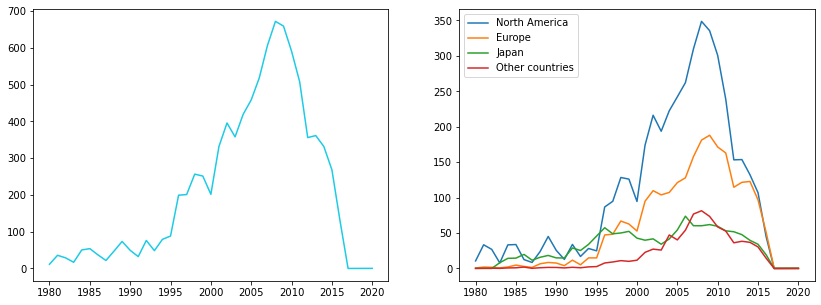

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(df_sales.Year_of_Release, df_sales.Global_Sales, color='#1ccbe5')

ax[1].plot(df_sales.Year_of_Release, df_sales.NA_Sales, label='North America')
ax[1].plot(df_sales.Year_of_Release, df_sales.EU_Sales, label='Europe')
ax[1].plot(df_sales.Year_of_Release, df_sales.JP_Sales, label='Japan')
ax[1].plot(df_sales.Year_of_Release, df_sales.Other_Sales, label='Other countries')


ax[1].legend()

### 2. Графики для категориальных переменных

In [125]:
df_rating = df.groupby('Genre')['Critic_Score'].mean().reset_index()

In [126]:
df_rating

,Genre,Critic_Score
0,Action,66.629101
1,Adventure,65.331269
2,Fighting,69.217604
3,Misc,66.619503
4,Platform,68.058350
5,Puzzle,67.424107
6,Racing,67.963612
7,Role-Playing,72.652646
8,Shooter,70.181144
9,Simulation,68.619318


Text(0, 0.5, 'Жанр')

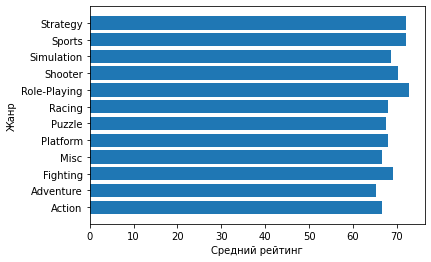

In [134]:
plt.barh(df_rating.Genre, df_rating.Critic_Score)
plt.xlabel('Средний рейтинг')
plt.ylabel('Жанр')

In [122]:
min(df.Critic_Score), max(df.Critic_Score)

(13.0, 98.0)

## Seaborn

Это пакет для статистических графиков, будем знакомиться подробно, когда будем изучать статистику